<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Логистическая регрессия***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сгенирируем классификацию (случайный датасет)

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [6]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


Метод визуализации распредление точек на диаграмме рассеивания

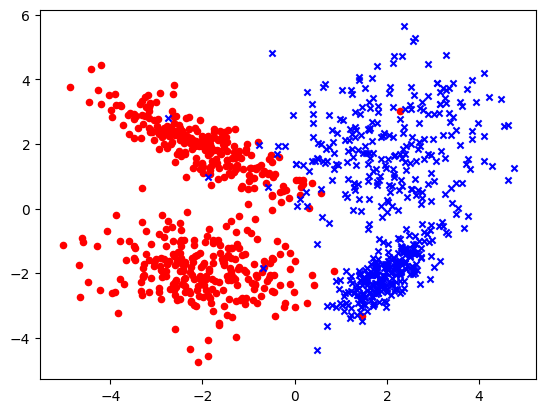

In [22]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)

model.score(X, y)

0.976

Координатная сетка

In [59]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.1),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.1))

#матрица всех точек на графике
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

#значение функции гипотезы
Z = model.predict_proba(XX)[:,1].reshape(xx.shape)

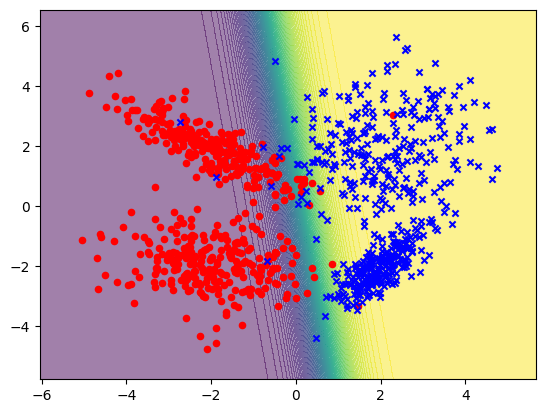

In [60]:
plt.contourf(xx, yy, Z, alpha=0.5, levels=100)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

# желтый близко к 1
# фиолетовый близко к 0

In [57]:
ZZ = model.predict(XX).reshape(xx.shape)

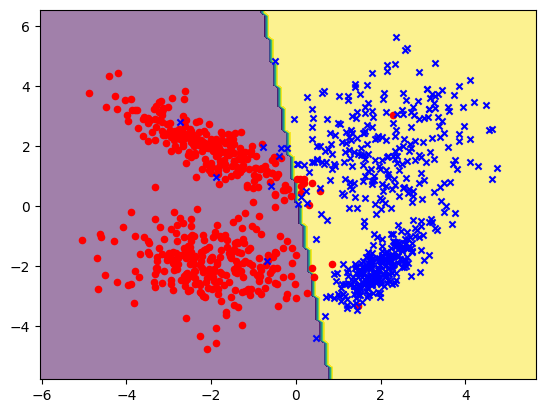

In [58]:
plt.contourf(xx, yy, ZZ, alpha=0.5, levels=100)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

Градиентный спуск

In [86]:
class SGD():
  """
  Конструктор класс
  alpha - скорость обучения
  _n_iters - кол-во итераций гралиентного спуска
  """
  def __init__(self, alpha=0.5, n_iters=1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters

  """
  Градиентный спуск
    b - вектор коэффициентов модели
    b_grad - градиент функции потерь
  """
  def gradient_step(self, b, b_grad):
          return b - self._alpha * b_grad

  """
  Запускаем градиентый спуск
    start_b - начальные веса.
  """
  def optimize(self, X, y, start_b, n_iters):
      b = start_b.copy()
      for i in range(n_iters):
          b_grad = self.grad_func(X, y, b)
          b = self.gradient_step(b, b_grad)
      return b

  """
  Обучение модели
    x - матрица признаков
    y - вектор целевых значений
  """
  def fit(self, X, y):
      m = X.shape[1]
      start_b = np.ones(m)
      self.b = self.optimize(X, y, start_b, self._n_iters)

Логистическая регрессия

In [88]:
class LogReg(SGD):
  """
  Функция вычисляет логистическую (сигмоида) функцию
    X - входные признаки
    b - веса модели
  """
  def sigmoid(self, X, b):
      return 1. / (1. + np.exp(-X.dot(b)))

  """
  Функция вычисляет градиент функции потерь логистической регрессии
    b — текущие веса модели
  """
  def grad_func(self, X, y, b):
      n = X.shape[0]
      grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
      return grad

  """
  Функция выдаёт вероятность принадлежности к классу 1
  """
  def predict_proba(self, X):
      return self.sigmoid(X, self.b)

  """
  Функция выдаёт бинарные предсказания (0 или 1) на основе порога 0.5
  """
  def predict(self, X):
      y_pred = self.predict_proba(X) > 0.5
      return y_pred

In [65]:
logreg = LogReg()

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [66]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [67]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [83]:
y_pred_proba = logreg.predict_proba(X)

Z = logreg.predict_proba(XX).reshape(xx.shape)

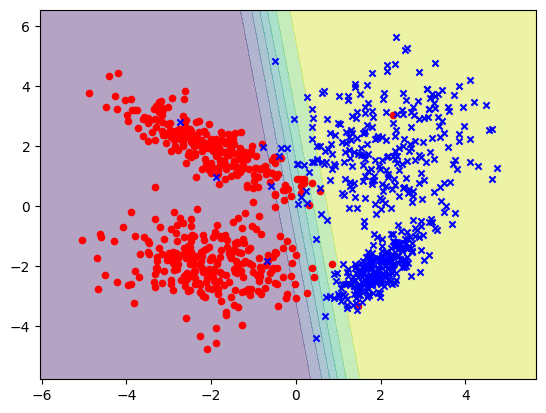

In [84]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=20)